# CNN_MELANOMA_ASSIGNMENT_RAMA_SHANKAR_PRAKASH_R

**Problem statement:** 
- To build a CNN based model which can accurately detect melanoma. 
- Melanoma is a type of cancer that can be deadly if not detected early. 
- It accounts for 75% of skin cancer deaths. 
- A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### 1. Importing all the important libraries

In [76]:
# import the required libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### 2. Importing the data

In [77]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [78]:
!unzip '/content/gdrive/MyDrive/CNN_assignment.zip' -d '/content/gdrive/MyDrive/upgrad/Dataset/'

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [79]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [80]:
# counting the images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### 3. Create a dataset

Create train & validation dataset from the train directory with a batch size of 32. Image size to be 180*180 and Define some parameters for the loader:

In [81]:
# Defining the above mentioned parameters
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [82]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
##todo
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [83]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
##todo
val_ds =tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [84]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [85]:
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))

32
32


32
32


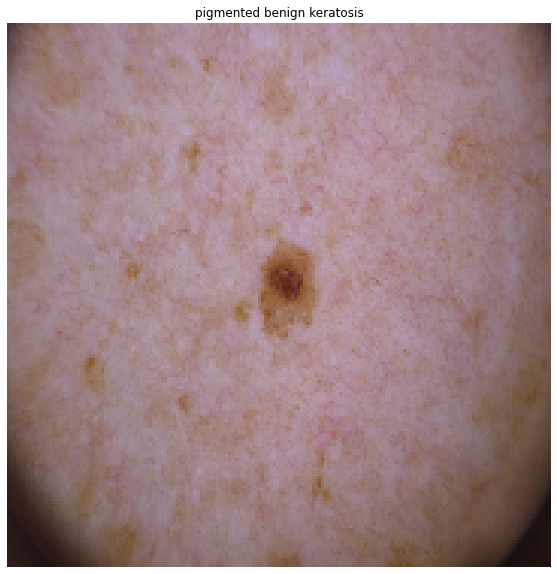

In [86]:
#plot the image
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))
  plt.imshow(images[0].numpy().astype("uint8"))
  plt.title(class_names[labels[0]])
  plt.axis("off")

### 4. Dataset visualisation:
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

<ipython-input-87-d15561a245bc>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i + 1)


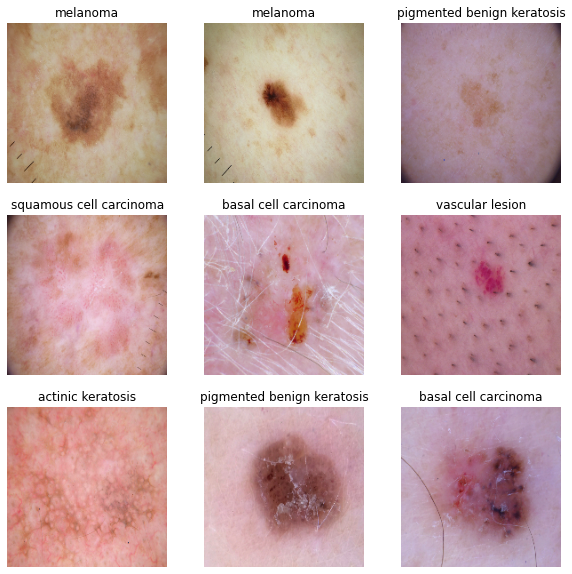

In [87]:

### your code goes here, you can use training or validation data to visualize
# visualize all 9 classes image 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(10):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off");

**Visualize distribution of classes in the training dataset.**

In [88]:
def class_distribution_count(directory):
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


In [89]:
# % of data for each class
df['No. of Image']/sum(df['No. of Image'])*100

0     5.091559
1    16.793211
2     4.242966
3    19.562305
4    15.944618
5    20.634212
6     3.439035
7     8.083966
8     6.208129
Name: No. of Image, dtype: float64

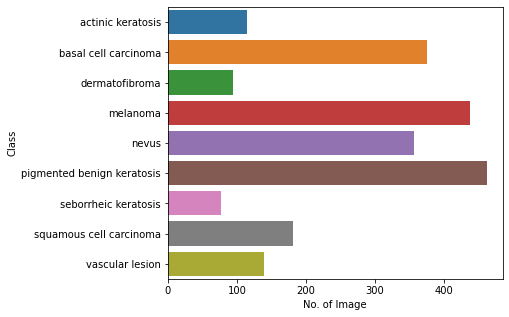

In [90]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [91]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 5. Model Building & training:

#### Todo: 
1. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
2. Choose an appropriate optimiser and loss function for model training
3. Train the model for ~20 epochs
4. Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.

In [92]:
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size. 
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. 
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size. 
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size. 
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(128, activation='relu'),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [93]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [94]:
# View the summary of all layers
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 45, 45, 64)       

### Train the model

In [95]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 133ms/step - loss: 1.8232 - accuracy: 0.3253 - val_loss: 1.6613 - val_accuracy: 0.3915
Epoch 2/20
56/56 [==============================] - 2s 32ms/step - loss: 1.4946 - accuracy: 0.4626 - val_loss: 1.4153 - val_accuracy: 0.4966
Epoch 3/20
56/56 [==============================] - 2s 32ms/step - loss: 1.3705 - accuracy: 0.5151 - val_loss: 1.4142 - val_accuracy: 0.5213
Epoch 4/20
56/56 [==============================] - 2s 33ms/step - loss: 1.2600 - accuracy: 0.5480 - val_loss: 1.4483 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 1s 25ms/step - loss: 1.1567 - accuracy: 0.5865 - val_loss: 1.3664 - val_accuracy: 0.5593
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.0582 - accuracy: 0.6250 - val_loss: 1.4312 - val_accuracy: 0.5503
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 0.9730 - accuracy: 0.6501 - val_loss: 1.4612 - val_accuracy: 0.5459
Epoch 8/20


### Visualizing training results

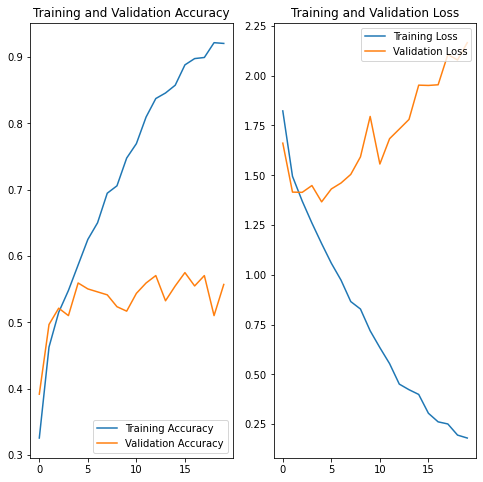

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Create another model with different layer**

In [97]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size. 
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size. 
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size. 
  layers.MaxPooling2D(),
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.Flatten(),
  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  layers.Dense(128, activation='relu'),
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])

In [98]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 45, 45, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 45, 45, 64)       

In [100]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 71ms/step - loss: 2.0783 - accuracy: 0.1970 - val_loss: 2.0303 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 4s 69ms/step - loss: 2.0251 - accuracy: 0.2076 - val_loss: 1.9952 - val_accuracy: 0.2953
Epoch 3/20
56/56 [==============================] - 4s 68ms/step - loss: 1.9005 - accuracy: 0.2829 - val_loss: 1.9423 - val_accuracy: 0.3043
Epoch 4/20
56/56 [==============================] - 4s 69ms/step - loss: 1.6978 - accuracy: 0.3739 - val_loss: 1.6363 - val_accuracy: 0.4251
Epoch 5/20
56/56 [==============================] - 4s 69ms/step - loss: 1.5060 - accuracy: 0.4676 - val_loss: 1.5379 - val_accuracy: 0.4787
Epoch 6/20
56/56 [==============================] - 4s 69ms/step - loss: 1.4105 - accuracy: 0.5078 - val_loss: 1.4401 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 4s 69ms/step - loss: 1.3008 - accuracy: 0.5519 - val_loss: 1.5174 - val_accuracy: 0.5011
Epoch 8/20
56

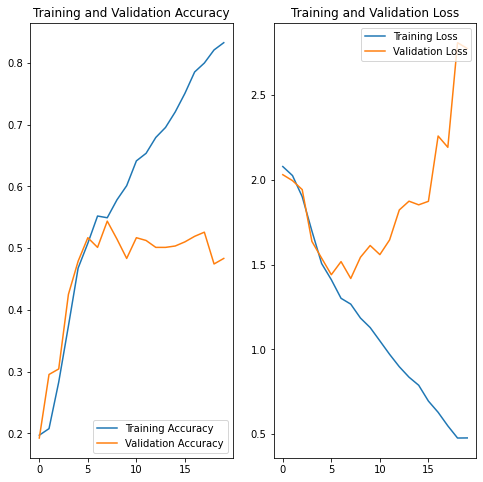

In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

#### **Interpretation:** 
- The model is overfitting because we can able to see there is large gap  bwtween Training Accuracy vs Validation Accuracy and training accuracy getting increased around 50% and Validation Accuracy remain in the same range. Also see difference in loss functions in training & test around the 10-11th epoch

- This modle is not generalised as the training accuracy is very high

### 6. Choosing an appropriate data augmentation strategy to resolve underfitting/overfitting 

In [102]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.experimental.preprocessing.RandomCrop(img_height,img_width),
  ]
)

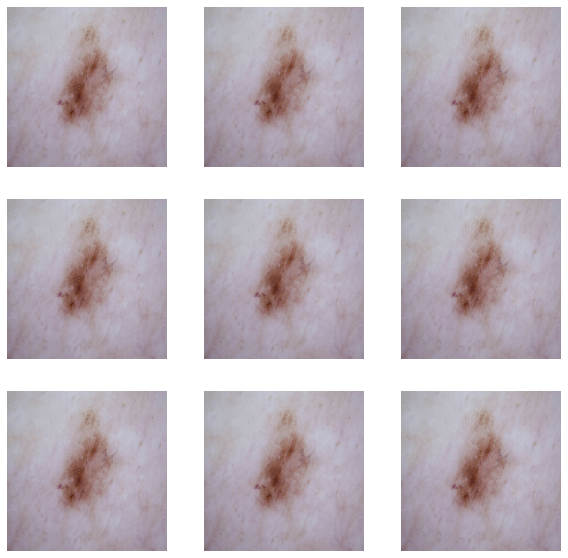

In [103]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### 7. Model Building & training on the augmented data :
- Creating a CNN model, which can accurately detect 9 classes present in the dataset. 
- Model rescaling images to normalize pixel values between (0,1).
- Choosing an appropriate optimiser and loss function for model training
- Training the model for ~20 epochs
- Writing the findings after the model fit, see if the earlier issue was resolved or not?

### Todo:
### Create the model, compile and train the model


In [104]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [105]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [106]:
## Your code goes here, note: train your model for 20 epochs
## your training code
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 13s 193ms/step - loss: 2.3441 - accuracy: 0.1987 - val_loss: 1.9995 - val_accuracy: 0.1991
Epoch 2/20
56/56 [==============================] - 11s 188ms/step - loss: 1.8806 - accuracy: 0.3103 - val_loss: 1.7153 - val_accuracy: 0.3803
Epoch 3/20
56/56 [==============================] - 11s 194ms/step - loss: 1.7175 - accuracy: 0.3549 - val_loss: 1.6975 - val_accuracy: 0.3087
Epoch 4/20
56/56 [==============================] - 11s 190ms/step - loss: 1.7492 - accuracy: 0.3449 - val_loss: 1.9520 - val_accuracy: 0.2685
Epoch 5/20
56/56 [==============================] - 11s 190ms/step - loss: 1.7649 - accuracy: 0.3449 - val_loss: 1.7875 - val_accuracy: 0.3266
Epoch 6/20
56/56 [==============================] - 11s 190ms/step - loss: 1.6823 - accuracy: 0.3772 - val_loss: 1.6552 - val_accuracy: 0.3333
Epoch 7/20
56/56 [==============================] - 11s 190ms/step - loss: 1.6239 - accuracy: 0.3917 - val_loss: 1.6648 - val_accuracy: 0.3826
Epoch 8/20

### Visualizing the results

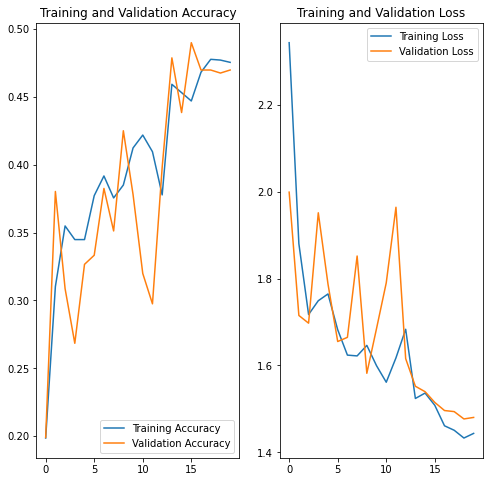

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Interpretation:** 

Question: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Answer: Finding from Second Model

- We can able to see there is not much improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation and Training Accuracy vs Validation Loss follow the same direction and there is not much gap between.

In [108]:
#train_dir = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
#val_dir = pathlib.Path('./Skin cancer ISIC The International Skin Imaging Collaboration/Test')
train_dir = pathlib.Path("/content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
val_dir = pathlib.Path('/content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Setting batch size and image size
batch_size = 100
IMG_SHAPE = 180 

# Create training images generator
#Generate batches of tensor image data with real-time data augmentation.
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

# Create validation images generator
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [110]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
num_classes = 9
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(num_classes))

In [111]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [112]:
epochs = 20

history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=epochs)

Epoch 1/20
23/23 [==============================] - 64s 3s/step - loss: 2.3309 - accuracy: 0.2180 - val_loss: 2.1848 - val_accuracy: 0.2203
Epoch 2/20
23/23 [==============================] - 54s 2s/step - loss: 1.7913 - accuracy: 0.3546 - val_loss: 2.2738 - val_accuracy: 0.2373
Epoch 3/20
23/23 [==============================] - 55s 2s/step - loss: 1.6398 - accuracy: 0.4011 - val_loss: 2.5843 - val_accuracy: 0.3051
Epoch 4/20
23/23 [==============================] - 55s 2s/step - loss: 1.5675 - accuracy: 0.4364 - val_loss: 2.3504 - val_accuracy: 0.3305
Epoch 5/20
23/23 [==============================] - 54s 2s/step - loss: 1.4380 - accuracy: 0.5016 - val_loss: 2.2861 - val_accuracy: 0.3475
Epoch 6/20
23/23 [==============================] - 55s 2s/step - loss: 1.3980 - accuracy: 0.5025 - val_loss: 2.1633 - val_accuracy: 0.3475
Epoch 7/20
23/23 [==============================] - 56s 2s/step - loss: 1.3502 - accuracy: 0.5284 - val_loss: 2.0804 - val_accuracy: 0.3644
Epoch 8/20
23/23 [==

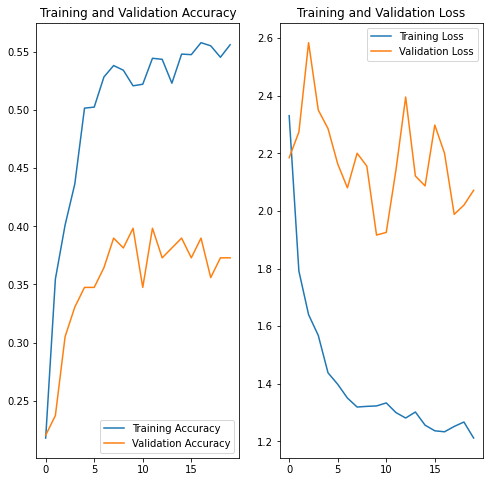

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Interpretation:** 

- The ImageDataGenerator that Generate batches of tensor image data with real-time data augmentatio and this model is not performing very well and able to see very high overfit.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [114]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [115]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/upgrad/Dataset/Skin ca...,actinic keratosis
1,/content/gdrive/MyDrive/upgrad/Dataset/Skin ca...,actinic keratosis
2,/content/gdrive/MyDrive/upgrad/Dataset/Skin ca...,actinic keratosis
3,/content/gdrive/MyDrive/upgrad/Dataset/Skin ca...,actinic keratosis
4,/content/gdrive/MyDrive/upgrad/Dataset/Skin ca...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/upgrad/Dataset/Skin ca...,vascular lesion
2235,/content/gdrive/MyDrive/upgrad/Dataset/Skin ca...,vascular lesion
2236,/content/gdrive/MyDrive/upgrad/Dataset/Skin ca...,vascular lesion
2237,/content/gdrive/MyDrive/upgrad/Dataset/Skin ca...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


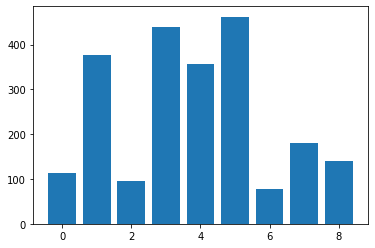

In [116]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- Seborrhic keratosis is the class which has least number of samples with 77.

#### - Which classes dominate the data in terms proportionate number of samples?
- Pigmented benign keratosis (462), Melanoma (438) and Basal cell carcinoma (376) are the classes which dominate in data in terms proportionate number of samples.


### 7. Handling class imbalances: Rectify class imbalances present in the training dataset with augmentor library
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [117]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [118]:
#path_to_training_dataset="/content/gdrive/MyDrive/SC/Train//"
path_to_training_dataset = "/content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F02B3373A00>: 100%|██████████| 500/500 [00:21<00:00, 23.12 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F02B333ED90>: 100%|██████████| 500/500 [00:26<00:00, 19.16 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F033349F7C0>: 100%|██████████| 500/500 [00:23<00:00, 20.99 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x7F02B34B1D90>: 100%|██████████| 500/500 [01:28<00:00,  5.65 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F02B24F0A90>: 100%|██████████| 500/500 [01:24<00:00,  5.93 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F02B6B09F70>: 100%|██████████| 500/500 [00:17<00:00, 28.25 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F039B24CBE0>: 100%|██████████| 500/500 [00:40<00:00, 12.26 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F02B6F7DA60>: 100%|██████████| 500/500 [00:17<00:00, 28.33 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train//vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F03335B22E0>: 100%|██████████| 500/500 [00:17<00:00, 28.73 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [119]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [120]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026212.jpg_73d37568-2562-4135-8d13-f7f89421363b.jpg',
 '/content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030142.jpg_26f60ee6-5f4e-4ef1-9095-df68e819c63d.jpg',
 '/content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027172.jpg_9f9731a1-68af-4349-aa56-733e9c2b8370.jpg',
 '/content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027958.jpg_ce1c6849-d30b-42d0-9896-8bb83e7b7b88.jpg',
 '/content/gdrive/MyDrive/upgrad/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic

In [121]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [122]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [123]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [124]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### 8. Train the model on the data created using Augmentor

In [125]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [126]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [127]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [128]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [129]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [130]:
epochs = 50
## Your code goes here, use 50 epochs.
# your model fit code
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/50
169/169 [==============================] - 41s 60ms/step - loss: 1.9097 - accuracy: 0.2856 - val_loss: 1.5419 - val_accuracy: 0.4402
Epoch 2/50
169/169 [==============================] - 4s 25ms/step - loss: 1.3926 - accuracy: 0.4826 - val_loss: 1.3456 - val_accuracy: 0.4900
Epoch 3/50
169/169 [==============================] - 4s 25ms/step - loss: 1.1959 - accuracy: 0.5540 - val_loss: 1.1615 - val_accuracy: 0.5865
Epoch 4/50
169/169 [==============================] - 4s 25ms/step - loss: 1.0216 - accuracy: 0.6250 - val_loss: 1.2263 - val_accuracy: 0.5768
Epoch 5/50
169/169 [==============================] - 4s 25ms/step - loss: 0.8801 - accuracy: 0.6812 - val_loss: 1.0265 - val_accuracy: 0.6281
Epoch 6/50
169/169 [==============================] - 4s 25ms/step - loss: 0.6679 - accuracy: 0.7576 - val_loss: 0.7694 - val_accuracy: 0.7275
Epoch 7/50
169/169 [==============================] - 4s 25ms/step - loss: 0.5308 - accuracy: 0.8108 - val_loss: 0.7579 - val_accuracy: 0.748

#### **Todo:**  Visualize the model results

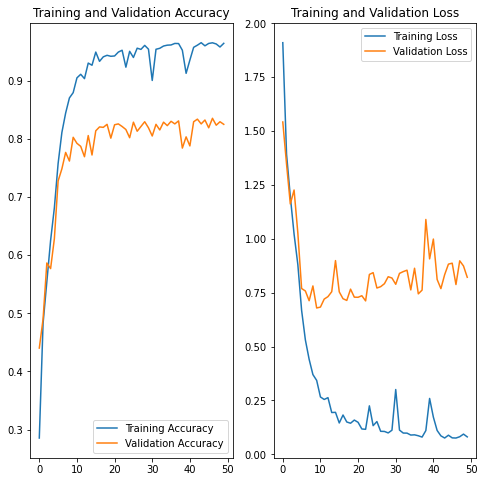

In [131]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [155]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes)
]) 

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 45, 45, 64)      

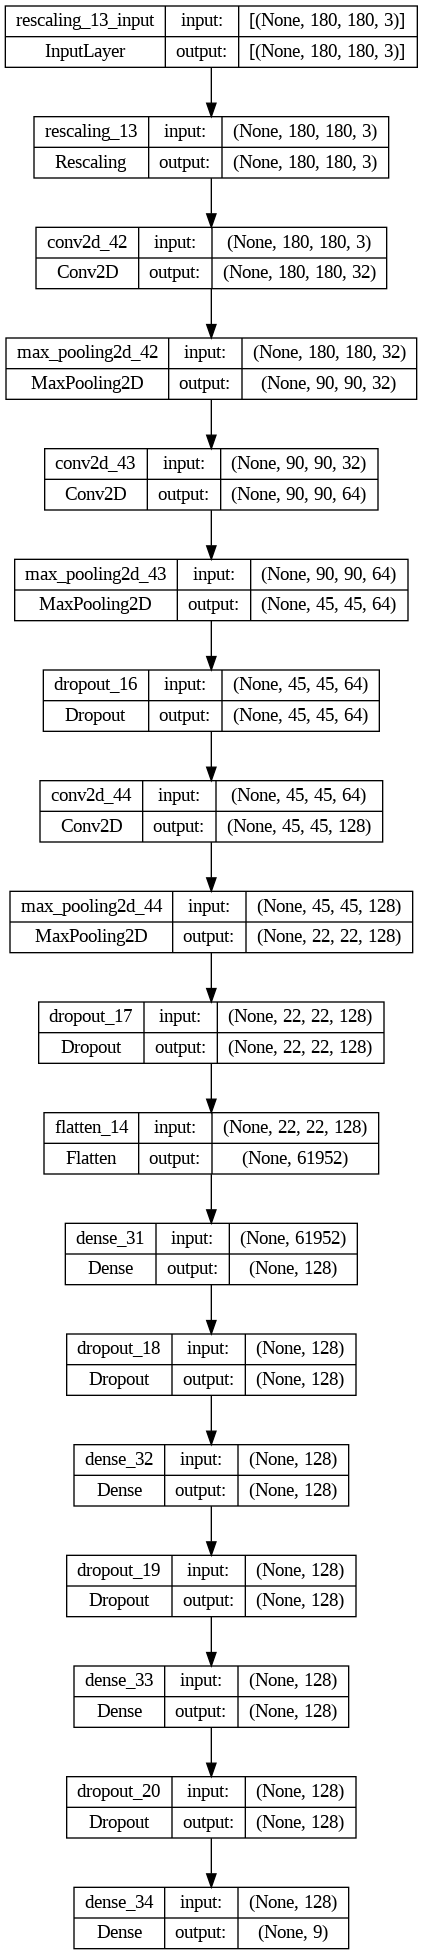

In [156]:
# vizualizing the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [157]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [158]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [159]:
# Train the model
epochs = 50
# your model fit code
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint,earlystop]
)

Epoch 1/50
169/169 [==============================] - ETA: 0s - loss: 2.1308 - accuracy: 0.1626
Epoch 1: val_accuracy improved from -inf to 0.23905, saving model to model.h5
169/169 [==============================] - 9s 47ms/step - loss: 2.1308 - accuracy: 0.1626 - val_loss: 1.9266 - val_accuracy: 0.2390
Epoch 2/50
169/169 [==============================] - ETA: 0s - loss: 1.7629 - accuracy: 0.3338
Epoch 2: val_accuracy improved from 0.23905 to 0.42836, saving model to model.h5
169/169 [==============================] - 8s 46ms/step - loss: 1.7629 - accuracy: 0.3338 - val_loss: 1.5621 - val_accuracy: 0.4284
Epoch 3/50
169/169 [==============================] - ETA: 0s - loss: 1.5636 - accuracy: 0.3986
Epoch 3: val_accuracy improved from 0.42836 to 0.46548, saving model to model.h5
169/169 [==============================] - 8s 46ms/step - loss: 1.5636 - accuracy: 0.3986 - val_loss: 1.4328 - val_accuracy: 0.4655
Epoch 4/50
169/169 [==============================] - ETA: 0s - loss: 1.4803

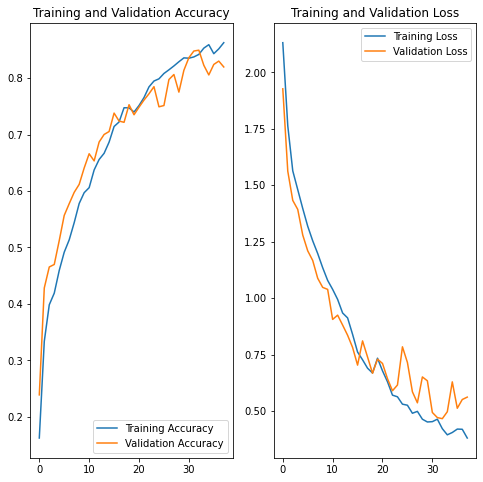

In [161]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(38)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [162]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img

In [163]:
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


1/1 [==============================] - 0s 18ms/step
Actual Class vascular lesion
This image most likely belongs to vascular lesion with a 100.00 percent confidence.


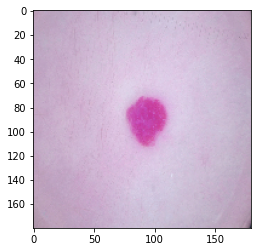

In [168]:
Test_image_path = os.path.join(data_dir_test, class_names[8], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)# Create a batch

predictions = model.predict(img)
score = tf.nn.softmax(predictions[0])
print("Actual Class "+ class_names[8])
print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**Interpretation:** 
    
    - After using the Augmentor for class imbalance, the basic model is unable to perform well.
    - But once we added more layers and dropout the performace of model is very good and able to get better accuracy, Class rebalance has helped us to overcome this problem.
    - Model prediction is able to predict the classes appropriately and able to provide accuracy 85% to output for unseen data.